In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pyspectools import figurefactory as ff

plt.style.use("publication")

/home/kelvin/anaconda3/lib/python3.7/site-packages/matplotlib/style/core.py:167: UserWarning: In /home/kelvin/.config/matplotlib/stylelib/cfa.mplstyle: Duplicate key in file "/home/kelvin/.config/matplotlib/stylelib/cfa.mplstyle", line #38
  styles = read_style_directory(stylelib_path)
/home/kelvin/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Molecular ions

In this notebook, we'll focus on getting extracting the discoveries of ions in space. The cations are quite straightforward, simply by looking for the "+" sign in the Molecules column. The anions are less straightforward, because the dash can be found in many other species. Instead, I've had to manually compile a list of anionic species.

In [2]:
df = pd.read_csv("astrochymist.csv")

In [3]:
cations_df = df[df["Molecule"].str.contains("\+")]

In [4]:
good_ans = ["C6H-", "C4H-", "C8H-", "C3N-", "C5N-", "CN-", "OCN–cyanate"]

anions_df = df[df["Molecule"].isin(good_ans)]

## Tallying up the results

This part will loop through the years between 1937 and to present, and tally up the discoveries in each year.

The step after generates a `pandas` DataFrame holding the cumulative sums of each type of molecule.

In [5]:
years = np.arange(df["Year"].min(), df["Year"].max() + 1)
total_tally = np.zeros(years.size)
anions_tally = np.zeros(years.size)
cations_tally = np.zeros(years.size)

In [6]:
for index, year in enumerate(years):
    total_tally[index] += len(df[df["Year"] == year])
    anions_tally[index] += len(anions_df[anions_df["Year"] == year])
    cations_tally[index] += len(cations_df[cations_df["Year"] == year])

In [7]:
tally_df = pd.DataFrame(
    data = [np.cumsum(array) for array in [total_tally, anions_tally, cations_tally]],
)
tally_df = tally_df.T
tally_df.columns = ["Total", "Anions", "Cations"]
tally_df["Years"] = years

In [8]:
tally_df.to_csv("ion_discoveries.csv",index=False)

## Plot up the molecular ion discoveries

Various annotations that go with the plot are special cases of discoveries.

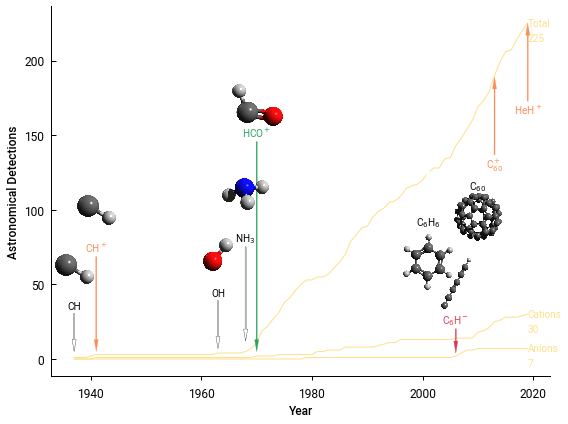

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(
    tally_df["Years"],
    tally_df["Anions"],
    label="Anions",
    color="#fee08b"
)
ax.plot(
    tally_df["Years"],
    tally_df["Cations"],
    label="Cations",
    color="#fee08b"
)
ax.plot(
    tally_df["Years"],
    tally_df["Total"],
    label="Total",
    color="#fee08b"
)

# Labels at the end of the figure
ax.text(2019., tally_df["Anions"].max(), "Anions", color="#fee08b", verticalalignment="center", horizontalalignment="left")
ax.text(2019., tally_df["Anions"].max() - 10, str(int(tally_df["Anions"].max())), color="#fee08b", verticalalignment="center", horizontalalignment="left")
ax.text(2019., tally_df["Cations"].max(), "Cations", color="#fee08b", verticalalignment="center", horizontalalignment="left")
ax.text(2019., tally_df["Cations"].max() - 10, str(int(tally_df["Cations"].max())), color="#fee08b", verticalalignment="center", horizontalalignment="left")
ax.text(2019., tally_df["Total"].max(), "Total", color="#fee08b", verticalalignment="center", horizontalalignment="left")
ax.text(2019., tally_df["Total"].max() - 10, str(int(tally_df["Total"].max())), color="#fee08b", verticalalignment="center", horizontalalignment="left")

# CH annotation
ax.annotate('CH',
            xy=(1937, 5), 
            xycoords='data',
            xytext=(0, 50),
            textcoords='offset points',
            arrowprops=dict(facecolor='white', width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top'
           )
ff.add_image(ax, "mol_renders/CH.png", position=[1937, 60])

# CH+ annotation
ax.annotate('CH$^+$',
            xy=(1941, 5), 
            xycoords='data',
            xytext=(0, 110),
            textcoords='offset points',
            arrowprops=dict(color="#fc8d59", width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top',
            color="#fc8d59"
           )
ff.add_image(ax, "mol_renders/CH.png", position=[1941, 100])

# OH annotation
ax.annotate('OH',
            xy=(1963, 7), 
            xycoords='data',
            xytext=(0, 60),
            textcoords='offset points',
            arrowprops=dict(facecolor='white', width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top'
           )
ff.add_image(ax, "mol_renders/OH.png", position=[1963, 70])

# NH3 annotation
ax.annotate('NH$_3$',
            xy=(1968, 12), 
            xycoords='data',
            xytext=(0, 110),
            textcoords='offset points',
            arrowprops=dict(facecolor='white', width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top'
           )
ff.add_image(ax, "mol_renders/NH3.png", position=[1968, 110])

# HCO+ annotation
ax.annotate('HCO$^+$',
            xy=(1970, 5), 
            xycoords='data',
            xytext=(0, 225),
            textcoords='offset points',
            arrowprops=dict(color='#2ca25f', width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top',
            color="#2ca25f"
           )
ff.add_image(ax, "mol_renders/HCO.png", position=[1970, 170])

# OCN- annotation
#ax.annotate('NCO$^-$',
#            xy=(1979, 5), 
#            xycoords='data',
#            xytext=(0, 110),
#            textcoords='offset points',
#            arrowprops=dict(color='#d53e4f', width=1., headwidth=4),
#            horizontalalignment='center', 
#            verticalalignment='top',
#            color="#d53e4f"
#           )
#ff.add_image(ax, "mol_renders/OCN.png", position=[1979, 95], zoom=0.07)

# C6H6 annotation
ax.annotate('C$_6$H$_6$',
            xy=(2001, 130), 
            xycoords='data',
            xytext=(0, -50),
            textcoords='offset points',
            arrowprops=dict(color='white', width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top',
            color="black"
           )
ff.add_image(ax, "mol_renders/C6H6.png", position=[2001, 65], zoom=0.07)

# C60 annotation
ax.annotate('C$_{60}$',
            xy=(2010, 167), 
            xycoords='data',
            xytext=(0, -70),
            textcoords='offset points',
            arrowprops=dict(color='white', width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top',
            color="black"
           )
ff.add_image(ax, "mol_renders/C60.png", position=[2010, 95], zoom=0.07)

# C60+ annotation
ax.annotate('C$_{60}^+$',
            xy=(2013, 189), 
            xycoords='data',
            xytext=(0, -80),
            textcoords='offset points',
            arrowprops=dict(color="#fc8d59", width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top',
            color="#fc8d59"
           )

# C6H- annotation
ax.annotate('C$_6$H$^-$',
            xy=(2006, 4), 
            xycoords='data',
            xytext=(0, 40),
            textcoords='offset points',
            arrowprops=dict(color="#d53e4f", width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top',
            color="#d53e4f"
           )
ff.add_image(ax, "mol_renders/C6H.png", position=[2006, 50], zoom=0.07)

# HeH+ annotation
ax.annotate('HeH$^+$',
            xy=(2019, 225), 
            xycoords='data',
            xytext=(0, -80),
            textcoords='offset points',
            arrowprops=dict(color="#fc8d59", width=1., headwidth=4),
            horizontalalignment='center', 
            verticalalignment='top',
            color="#fc8d59"
           )

ax.set_ylabel("Astronomical Detections", fontweight=500)
ax.set_xlabel("Year", fontweight=500)

ax.tick_params(axis="y", direction="in", length=5.)

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

fig.savefig("molecules-in-space.png", dpi=300, format='png', transparent=True)
fig.savefig("molecules-in-space.pdf", dpi=300, format="pdf", transparent=True)

/home/kelvin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



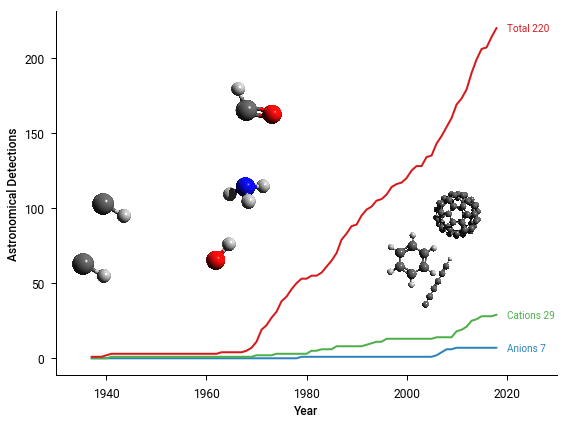

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(
    tally_df["Years"],
    tally_df["Anions"],
    label="Anions",
    lw=2,
    color="#2b83ba"
)
ax.plot(
    tally_df["Years"],
    tally_df["Cations"],
    label="Cations",
    lw=2,
    color="#4daf4a"
)
ax.plot(
    tally_df["Years"],
    tally_df["Total"],
    label="Total",
    lw=2,
    color="#d7191c"
)

# Labels at the end of the figure
ax.text(2020., tally_df["Anions"].max(), "Anions " + str(int(tally_df["Anions"].max())), color="#2b83ba", verticalalignment="center", horizontalalignment="left")
#ax.text(2018., tally_df["Anions"].max() - 10, str(int(tally_df["Anions"].max())), color="#2b83ba", verticalalignment="center", horizontalalignment="left")
ax.text(2020., tally_df["Cations"].max(), "Cations " + str(int(tally_df["Cations"].max())), color="#4daf4a", verticalalignment="center", horizontalalignment="left")
#ax.text(2018., tally_df["Cations"].max() - 10, str(int(tally_df["Cations"].max())), color="#4daf4a", verticalalignment="center", horizontalalignment="left")
ax.text(2020., tally_df["Total"].max(), "Total " + str(int(tally_df["Total"].max())), color="#d7191c", verticalalignment="center", horizontalalignment="left")
#ax.text(2018., tally_df["Total"].max() - 10, str(int(tally_df["Total"].max())), color="#d7191c", verticalalignment="center", horizontalalignment="left")

ff.add_image(ax, "mol_renders/CH.png", position=[1937, 60])

ff.add_image(ax, "mol_renders/CH.png", position=[1941, 100])

ff.add_image(ax, "mol_renders/OH.png", position=[1963, 70])

ff.add_image(ax, "mol_renders/NH3.png", position=[1968, 110])

ff.add_image(ax, "mol_renders/HCO.png", position=[1970, 170])

ff.add_image(ax, "mol_renders/C6H6.png", position=[2001, 65], zoom=0.07)

ff.add_image(ax, "mol_renders/C60.png", position=[2010, 95], zoom=0.07)

ff.add_image(ax, "mol_renders/C6H.png", position=[2006, 50], zoom=0.07)

ax.set_ylabel("Astronomical Detections", fontweight=500)
ax.set_xlabel("Year", fontweight=500)

ax.tick_params(axis="both", direction="out", length=5., width=1.)
ax.set_xlim([1930, 2030])

fig.savefig("no-annotate-full.png", dpi=300, format='png', transparent=True)

/home/kelvin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



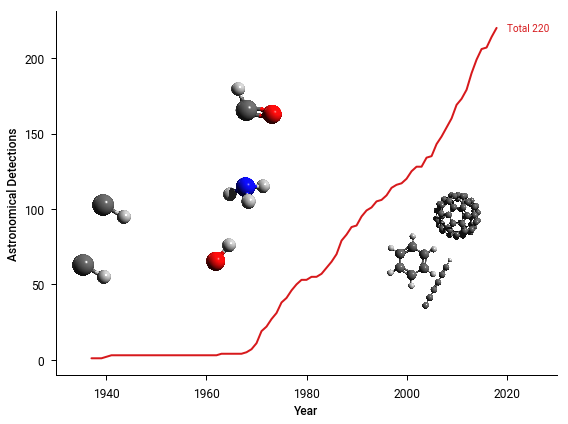

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(
    tally_df["Years"],
    tally_df["Total"],
    label="Total",
    lw=2,
    color="#d7191c"
)

# Labels at the end of the figure

ax.text(2020., tally_df["Total"].max(), "Total " + str(int(tally_df["Total"].max())), color="#d7191c", verticalalignment="center", horizontalalignment="left")

ff.add_image(ax, "mol_renders/CH.png", position=[1937, 60])

ff.add_image(ax, "mol_renders/CH.png", position=[1941, 100])

ff.add_image(ax, "mol_renders/OH.png", position=[1963, 70])

ff.add_image(ax, "mol_renders/NH3.png", position=[1968, 110])

ff.add_image(ax, "mol_renders/HCO.png", position=[1970, 170])

ff.add_image(ax, "mol_renders/C6H6.png", position=[2001, 65], zoom=0.07)

ff.add_image(ax, "mol_renders/C60.png", position=[2010, 95], zoom=0.07)

ff.add_image(ax, "mol_renders/C6H.png", position=[2006, 50], zoom=0.07)

ax.set_ylabel("Astronomical Detections", fontweight=500)
ax.set_xlabel("Year", fontweight=500)

ax.tick_params(axis="both", direction="out", length=5., width=1.)
ax.set_xlim([1930, 2030])

fig.savefig("no-annotate-noions.png", dpi=300, format='png', transparent=True)